##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [1]:
import pandas as pd 
import patsy
from sklearn import model_selection, linear_model, metrics
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('SCORES.csv')

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

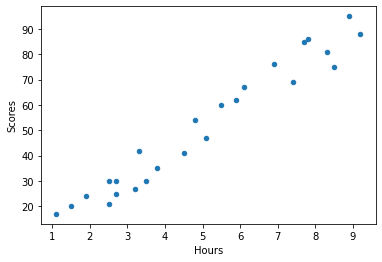

In [2]:
data.plot.scatter('Hours', 'Scores')

In [3]:
x = data.Hours
y = data.Scores
pat = patsy.dmatrices('y ~ x', data)

x_learning, x_testing, y_learning, y_testing = model_selection.train_test_split(data.Hours, data.Scores, train_size=0.3, test_size=0.3, shuffle= True)
reg = linear_model.LinearRegression(fit_intercept=True, copy_X=True).fit(x_learning.to_numpy()[:, None], y_learning)

print("Coef: {0}\nIntercept: {1}".format(reg.coef_, reg.intercept_))

Coef: [10.40453074]
Intercept: 1.5462320850670181


Coef - współczynniki zmiennych niezależnych - jest dość wysoki, łatwo będzie wykonać regresję

Intercept - wolny wyraz

In [4]:
y_pred = reg.predict(x_testing.to_numpy()[:, None])

for i in range(len(x_testing)):
    print("x: {0},   predicted: {1:.2f},   actual: {2}".format(x_testing.to_numpy()[i], y_pred[i], y_testing.to_numpy()[i]))

x: 4.8,   predicted: 51.49,   actual: 54
x: 1.5,   predicted: 17.15,   actual: 20
x: 2.7,   predicted: 29.64,   actual: 25
x: 2.5,   predicted: 27.56,   actual: 30
x: 9.2,   predicted: 97.27,   actual: 88
x: 8.3,   predicted: 87.90,   actual: 81
x: 3.2,   predicted: 34.84,   actual: 27
x: 6.1,   predicted: 65.01,   actual: 67


Wyniki są inne, jednak wpasowują się w oryginalne dane z jakimś błędem

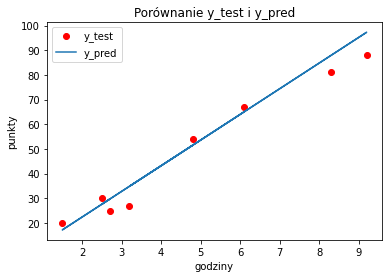

In [5]:
plt.plot(x_testing, y_testing, 'ro', x_testing, y_pred)
plt.xlabel("godziny")
plt.ylabel("punkty")
plt.title("Porównanie y_test i y_pred")
plt.legend(["y_test", "y_pred"])
plt.show()

In [6]:
residuum = y_pred -y_testing
mae = np.abs(residuum).mean()
mse = np.abs(np.square(residuum).mean())
rmse = np.sqrt(np.abs(np.square(residuum).mean()))
print("Mean Absolute Error: {0:.2f}\nMean Squared Error: {1:.2f}\nRoot Mean Squared Error: {2:.2f}".format(mae, mse, rmse))

Mean Absolute Error: 4.80
Mean Squared Error: 30.11
Root Mean Squared Error: 5.49


Jakość regresji liniowej dla tych danych jest satysfakcjonująca. Doskonale prezentuje to wykres oraz wyliczone nieskie błędy

### SBP

Coef: [0.98775056]
Intercept: 60.59131403118045

x: 61,   predicted: 120.84,   actual: 112
x: 56,   predicted: 115.91,   actual: 124
x: 60,   predicted: 119.86,   actual: 111
x: 63,   predicted: 122.82,   actual: 118
x: 63,   predicted: 122.82,   actual: 136
x: 61,   predicted: 120.84,   actual: 120


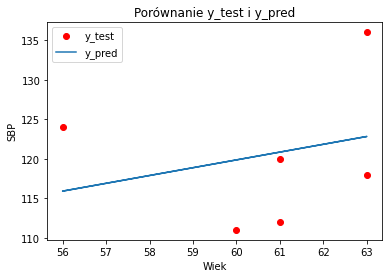

Mean Absolute Error: 7.44
Mean Squared Error: 69.97
Root Mean Squared Error: 8.37


In [7]:
sbp = pd.read_csv('SBP.csv')
x_1 = sbp.Age
y_1 = sbp.SBP
pat_1 = patsy.dmatrices('y_1 ~ x_1', sbp)

x_1_learning, x_1_testing, y_1_learning, y_1_testing = model_selection.train_test_split(sbp.Age , sbp.SBP, test_size=0.3, train_size=0.3, shuffle= True)
reg_1 = linear_model.LinearRegression(fit_intercept=True, copy_X=True).fit(x_1_learning.to_numpy()[:, None], y_1_learning)
print("Coef: {0}\nIntercept: {1}\n".format(reg_1.coef_, reg_1.intercept_))

y_1_pred = reg_1.predict(x_1_testing.to_numpy()[:, None])
for i in range(len(x_1_testing)):
    print("x: {0},   predicted: {1:.2f},   actual: {2}".format(x_1_testing.to_numpy()[i], y_1_pred[i], y_1_testing.to_numpy()[i]))

plt.plot(x_1_testing, y_1_testing, 'ro', x_1_testing, y_1_pred)
plt.xlabel("Wiek")
plt.ylabel("SBP")
plt.title("Porównanie y_test i y_pred")
plt.legend(["y_test", "y_pred"])
plt.show()

residuum_1 = y_1_pred - y_1_testing
mae_1 = np.abs(residuum_1).mean()
mse_1 = np.abs(np.square(residuum_1).mean())
rmse_1 = np.sqrt(np.abs(np.square(residuum_1).mean()))
print("Mean Absolute Error: {0:.2f}\nMean Squared Error: {1:.2f}\nRoot Mean Squared Error: {2:.2f}".format(mae_1, mse_1, rmse_1))

Dla takiego zestawu danych wyniki nie są równie zadowalające jak w poprzednim przypadku. Dane testowe są od siebie dosyć oddalone, i ciężej jest wykonać zadowalającą nas regresję liniową. Potwierdzają to wyliczone błędy, które większe.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

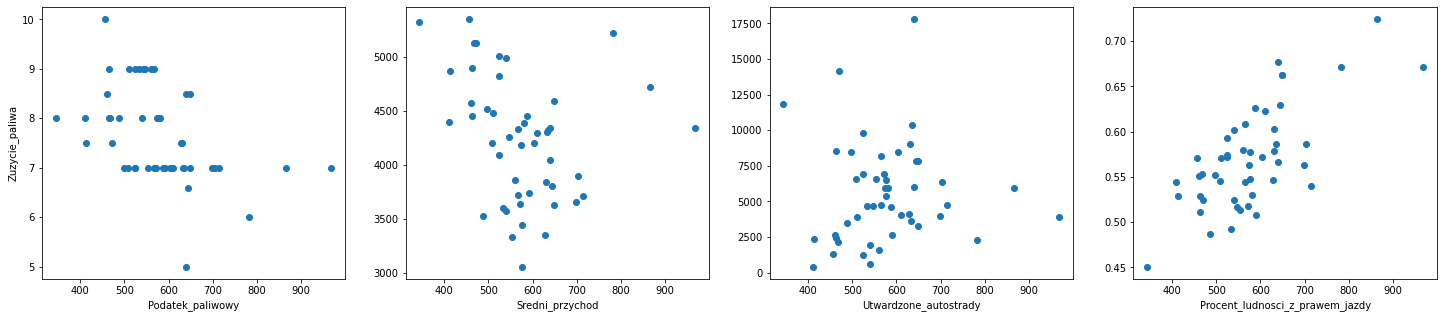

Coef: [-1.52412016e+01 -9.99910551e-02  7.46763761e-04  8.44034723e+02]
Intercept: 634.9858534588444

x: [8.000e+00 3.528e+03 3.495e+03 4.870e-01],   predicted: 573.94,   actual: 487
x: [9.000e+00 4.092e+03 1.250e+03 5.720e-01],   predicted: 572.37,   actual: 524
x: [9.000e+00 4.258e+03 4.686e+03 5.170e-01],   predicted: 511.92,   actual: 547
x: [7.000e+00 3.745e+03 2.611e+03 5.080e-01],   predicted: 584.55,   actual: 591
x: [7.000e+00 3.640e+03 6.905e+03 5.180e-01],   predicted: 606.70,   actual: 571
x: [8.000e+00 3.448e+03 5.399e+03 5.480e-01],   predicted: 634.85,   actual: 577
x: [7.500e+00 3.357e+03 4.121e+03 5.470e-01],   predicted: 649.77,   actual: 628
x: [8.500e+00 4.574e+03 2.619e+03 5.510e-01],   predicted: 515.10,   actual: 460
x: [7.000e+00 4.345e+03 3.905e+03 6.720e-01],   predicted: 663.94,   actual: 968
x: [9.000e+00 4.897e+03 2.449e+03 5.110e-01],   predicted: 441.29,   actual: 464
x: [9.000e+00 3.571e+03 1.976e+03 5.250e-01],   predicted: 585.34,   actual: 541
x: [7.0

In [8]:
petrol = pd.read_csv('PETROL.csv')
petrol
y = petrol.Zuzycie_paliwa
x_1 = petrol.Podatek_paliwowy
x_2 = petrol.Sredni_przychod
x_3 = petrol.Utwardzone_autostrady
x_4 = petrol.Procent_ludnosci_z_prawem_jazdy

pat = patsy.dmatrices('y ~ x_1 + x_2 + x_3 + x_4', petrol)

x_label = ["Podatek_paliwowy", "Sredni_przychod", "Utwardzone_autostrady", "Procent_ludnosci_z_prawem_jazdy"]
x_list = [petrol[label] for label in x_label]

fig, ax = plt.subplots(1, len(x_label), figsize=(25, 5))
for idx, el in enumerate(x_label):
    ax[idx].scatter(petrol["Zuzycie_paliwa"], petrol[el])
    ax[idx].set_xlabel(el)
ax[0].set_ylabel("Zuzycie_paliwa")
plt.show()

x_learning, x_testing, y_learning, y_testing = model_selection.train_test_split(np.array(x_list).transpose() , petrol["Zuzycie_paliwa"], train_size=0.3, test_size=0.3, shuffle= True)
reg = linear_model.LinearRegression(fit_intercept=True, copy_X=True).fit(x_learning, y_learning)
print("Coef: {0}\nIntercept: {1}\n".format(reg.coef_, reg.intercept_))

y_pred = reg.predict(x_testing)
for i in range(len(x_testing)):
    print("x: {0},   predicted: {1:.2f},   actual: {2}".format(x_testing[i], y_pred[i], y_testing.to_numpy()[i]))
print("\n")

# plt.plot(x_testing[:,3], y_testing, 'ro', x_testing[:,3], y_pred)
# plt.xlabel("Wiek")
# plt.ylabel("SBP")
# plt.title("Porównanie y_test i y_pred")
# plt.legend(["y_test", "y_pred"])
# plt.show()

residuum = y_pred - y_testing
mae = np.abs(residuum).mean()
mse = np.abs(np.square(residuum).mean())
rmse = np.sqrt(np.abs(np.square(residuum).mean()))
print("Mean Absolute Error: {0:.2f}\nMean Squared Error: {1:.2f}\nRoot Mean Squared Error: {2:.2f}".format(mae, mse, rmse))

W tym przypadku nie da się wykonać regresji liniowej. Świadczą o tym współczynniki zmiennych niezależnych, które są bardzo niskie. Wartości błędów również są znacznie gorsze od poprzednich przypadków.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [9]:
# zmienna zależna num (y)
heart = pd.read_csv("HEART.csv")
heart_processed = heart.drop(columns = ["slope", "ca", "thal"]).replace('?', np.NaN).dropna().reset_index().drop(columns="index")
heart_processed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,30,0,1,170,237,0,1,170,0,0.0,0
3,31,0,2,100,219,0,1,150,0,0.0,0
4,32,0,2,105,198,0,0,165,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
256,52,1,4,160,331,0,0,94,1,2.5,1
257,54,0,3,130,294,0,1,100,1,0.0,1
258,56,1,4,155,342,1,0,150,1,3.0,1
259,58,0,2,180,393,0,0,110,1,1.0,1


In [10]:
dummy = pd.get_dummies(heart_processed, columns=["cp", "restecg"])
dummy

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,0,1,0,0,0,0,1
1,29,1,120,243,0,160,0,0.0,0,0,1,0,0,1,0,0
2,30,0,170,237,0,170,0,0.0,0,1,0,0,0,0,1,0
3,31,0,100,219,0,150,0,0.0,0,0,1,0,0,0,1,0
4,32,0,105,198,0,165,0,0.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,52,1,160,331,0,94,1,2.5,1,0,0,0,1,1,0,0
257,54,0,130,294,0,100,1,0.0,1,0,0,1,0,0,1,0
258,56,1,155,342,1,150,1,3.0,1,0,0,0,1,1,0,0
259,58,0,180,393,0,110,1,1.0,1,0,1,0,0,1,0,0


In [25]:
y_label = "num       "
x_label = ["age", "sex", "trestbps", "chol", "fbs", "thalach", "exang", "oldpeak", "cp_1", "cp_2", "cp_3", "cp_4", "restecg_0", "restecg_1", "restecg_2"]
x_list = [dummy[el] for el in x_label]
x_a = dummy[x_label]
x_learning, x_testing, y_learning, y_testing = model_selection.train_test_split(x_a, dummy["num       "], train_size=0.2, test_size=0.2, shuffle= True)
reg = linear_model.LogisticRegression(fit_intercept=True, max_iter=2e16).fit(x_learning, y_learning)

print("Coef: {0}\nIntercept: {1}\n\n".format(reg.coef_, reg.intercept_))

y_pred = reg.predict(x_testing)

residuum = y_pred - y_testing
mae = np.abs(residuum).mean()
mse = np.abs(np.square(residuum).mean())
rmse = np.sqrt(np.abs(np.square(residuum).mean()))
print("Mean Absolute Error: {0:.2f}\nMean Squared Error: {1:.2f}\nRoot Mean Squared Error: {2:.2f}\n\n".format(mae, mse, rmse))

target_names = ['class 0', 'class 1']
print(metrics.classification_report(y_testing, y_pred, target_names=target_names))


Coef: [[-0.0578876   0.95706346  0.01611561  0.01283324  0.80476762 -0.01335823
   0.24857426  1.32090927  0.24382488 -0.96482816  0.15356402  0.56231318
   0.21345862 -0.21858469  0.        ]]
Intercept: [-3.3375511]


Mean Absolute Error: 0.21
Mean Squared Error: 0.21
Root Mean Squared Error: 0.46


              precision    recall  f1-score   support

     class 0       0.84      0.86      0.85        36
     class 1       0.69      0.65      0.67        17

    accuracy                           0.79        53
   macro avg       0.76      0.75      0.76        53
weighted avg       0.79      0.79      0.79        53



Regresja logistyczna w tym przypadku sprawdziła się dosyć dobrze. Świadczy o tym dopasowanie na poziomie 79 %.